In [58]:
import pandas as pd
import os
from collections import Counter
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd /media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports


In [4]:
ls

01-22-2020.csv*  02-07-2020.csv*  02-23-2020.csv*  03-10-2020.csv*
01-23-2020.csv*  02-08-2020.csv*  02-24-2020.csv*  03-11-2020.csv*
01-24-2020.csv*  02-09-2020.csv*  02-25-2020.csv*  03-12-2020.csv*
01-25-2020.csv*  02-10-2020.csv*  02-26-2020.csv*  03-13-2020.csv*
01-26-2020.csv*  02-11-2020.csv*  02-27-2020.csv*  03-14-2020.csv*
01-27-2020.csv*  02-12-2020.csv*  02-28-2020.csv*  03-15-2020.csv*
01-28-2020.csv*  02-13-2020.csv*  02-29-2020.csv*  03-16-2020.csv*
01-29-2020.csv*  02-14-2020.csv*  03-01-2020.csv*  03-17-2020.csv*
01-30-2020.csv*  02-15-2020.csv*  03-02-2020.csv*  03-18-2020.csv*
01-31-2020.csv*  02-16-2020.csv*  03-03-2020.csv*  03-19-2020.csv*
02-01-2020.csv*  02-17-2020.csv*  03-04-2020.csv*  03-20-2020.csv*
02-02-2020.csv*  02-18-2020.csv*  03-05-2020.csv*  03-21-2020.csv*
02-03-2020.csv*  02-19-2020.csv*  03-06-2020.csv*  03-22-2020.csv*
02-04-2020.csv*  02-20-2020.csv*  03-07-2020.csv*  README.md*
02-05-2020.csv*  02-21-2020.csv*  03-08-2020.csv*
02-06-2020.csv*  

In [5]:
a = pd.read_csv("/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv")

In [6]:
a.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/23/20 17:00,9.0,NaN,NaN
1,Beijing,Mainland China,1/23/20 17:00,22.0,NaN,NaN
2,Chongqing,Mainland China,1/23/20 17:00,9.0,NaN,NaN
3,Fujian,Mainland China,1/23/20 17:00,5.0,NaN,NaN
4,Gansu,Mainland China,1/23/20 17:00,2.0,NaN,NaN


In [7]:
province_list = []
for i in a['Province/State']:
    province_list.append(i)

In [8]:
len(province_list)

46

In [9]:
province_counts = Counter(province_list)

In [10]:
province_counts

Counter({'Anhui': 1,
         'Beijing': 1,
         'Chongqing': 1,
         'Fujian': 1,
         'Gansu': 1,
         'Guangdong': 1,
         'Guangxi': 1,
         'Guizhou': 1,
         'Hainan': 1,
         'Hebei': 1,
         'Heilongjiang': 1,
         'Henan': 1,
         'Hong Kong': 1,
         'Hubei': 1,
         'Hunan': 1,
         'Inner Mongolia': 1,
         'Jiangsu': 1,
         'Jiangxi': 1,
         'Jilin': 1,
         'Liaoning': 1,
         'Macau': 1,
         'Ningxia': 1,
         'Qinghai': 1,
         'Shaanxi': 1,
         'Shandong': 1,
         'Shanghai': 1,
         'Shanxi': 1,
         'Sichuan': 1,
         'Taiwan': 1,
         'Tianjin': 1,
         'Tibet': 1,
         'Washington': 1,
         'Xinjiang': 1,
         'Yunnan': 1,
         'Zhejiang': 1,
         nan: 11})

In [11]:
list_of_all_files = os.listdir()

In [24]:
# list_of_all_files

In [13]:
actual_list = []
for i in list_of_all_files:
    if "csv" in i:
        actual_list.append(i)

In [61]:
main = []
province_list = []
country_list = []
confirmed = []
death_count = []
date_list = []
for j in tqdm(actual_list):
    a = pd.read_csv(j)
    for i in range(len(a)):
        date_list.append("Date: " + str(j[:-4]))
    for i in a['Province/State']:
        province_list.append(i)
    for i in a['Country/Region']:
        country_list.append(i)
    for i in a['Confirmed']:
        confirmed.append(i)
    for i in a['Deaths']:
        death_count.append(i)
    
    

100%|██████████| 61/61 [00:00<00:00, 291.88it/s]


In [62]:
main_df = pd.DataFrame({
    'date': date_list,
    'state': province_list,
    'country':country_list,
    'confirmed_case': confirmed,
    'death': death_count
})

In [63]:
len(death_count)

7926

In [64]:
Counter(country_list)['Bangladesh']

15

In [72]:
total_confirmed_case = 0.0
case_of_bd = []
case_of_death_bd = []
date_of_bd = []
for index, row in main_df.iterrows():
    if row['country'] == "Bangladesh":
        print(row['date'], " Confirmed Cases: ", row['confirmed_case'], " Confirmed Death: ", row['death'])
        total_confirmed_case += row['confirmed_case']
        case_of_bd.append(row['confirmed_case'])
        case_of_death_bd.append(row['death'])
        date_of_bd.append(row['date'])
        
# print(total_confirmed_case)
bd_df = pd.DataFrame({
    'date': date_of_bd,
    'confirmed_case': case_of_bd,
    'death': case_of_death_bd
})

Date: 03-08-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-09-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-10-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-11-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-12-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-13-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-14-2020  Confirmed Cases:  3.0  Confirmed Death:  0.0
Date: 03-15-2020  Confirmed Cases:  5.0  Confirmed Death:  0.0
Date: 03-16-2020  Confirmed Cases:  8.0  Confirmed Death:  0.0
Date: 03-17-2020  Confirmed Cases:  10.0  Confirmed Death:  0.0
Date: 03-18-2020  Confirmed Cases:  14.0  Confirmed Death:  1.0
Date: 03-19-2020  Confirmed Cases:  17.0  Confirmed Death:  1.0
Date: 03-20-2020  Confirmed Cases:  20.0  Confirmed Death:  1.0
Date: 03-21-2020  Confirmed Cases:  25.0  Confirmed Death:  2.0
Date: 03-22-2020  Confirmed Cases:  27.0  Confirmed Death:  2.0


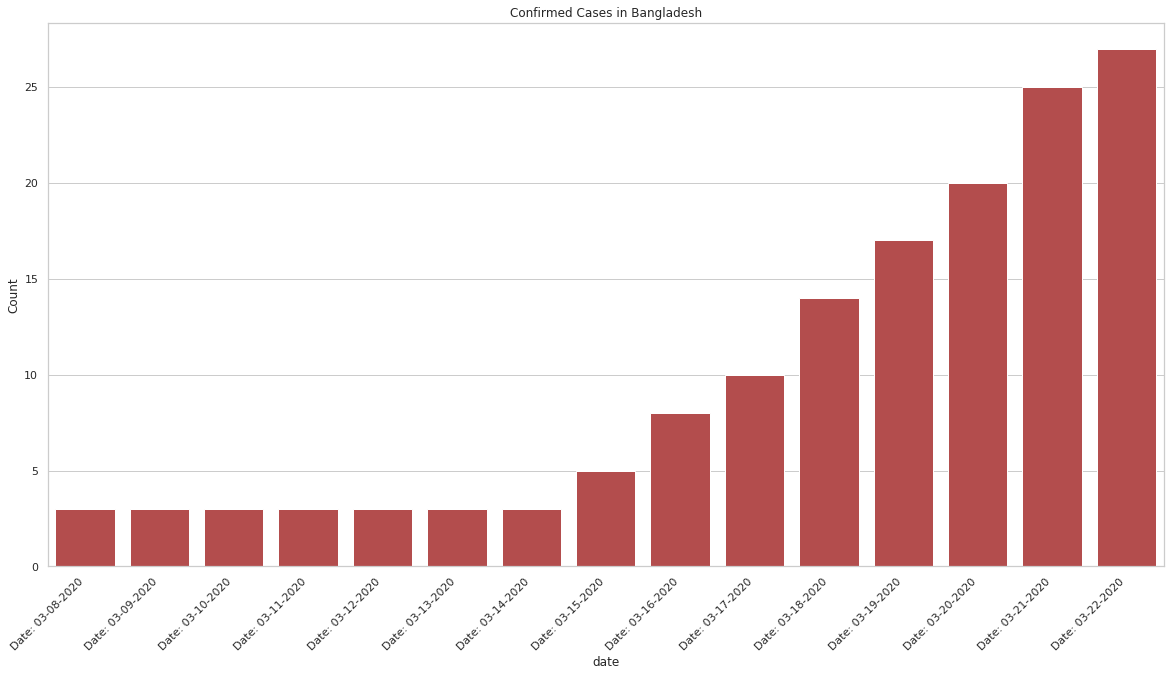

In [131]:
ax = plt.figure(figsize=(20,10))

# Add title
ax = plt.title("Confirmed Cases in Bangladesh")


ax = sns.barplot(y=bd_df['confirmed_case'], x=bd_df['date'], saturation = 0.4, color="red")



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=bd_df['date'], rotation=45, ha='right')


ax = plt.ylabel("Count")

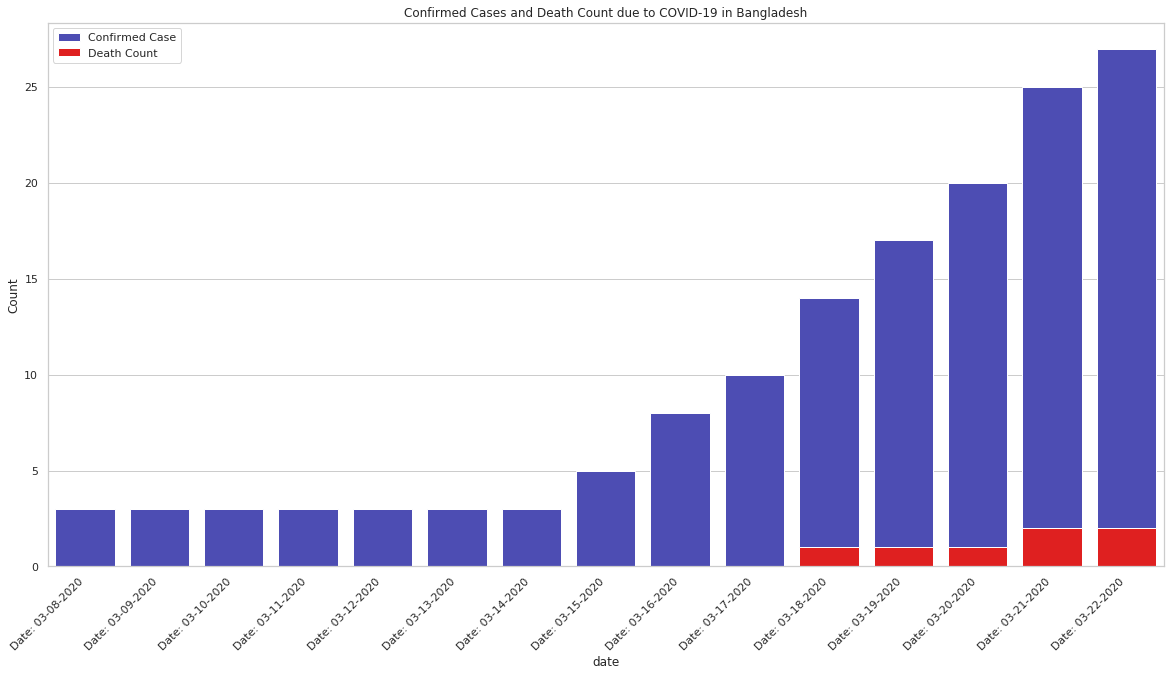

In [181]:
ax = plt.figure(figsize=(20,10))

# Add title
ax = plt.title("Confirmed Cases and Death Count due to COVID-19 in Bangladesh")


ax = sns.barplot(y=bd_df['confirmed_case'], x=bd_df['date'], saturation = 0.4, color = 'Blue', label = "Confirmed Case")

ax = sns.barplot(x = bd_df['date'], y = bd_df['death'], color = 'red', label = "Death Count")

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=bd_df['date'], rotation=45, ha='right')


ax = plt.ylabel("Count")

In [185]:
Counter(country_list).most_common(30)

[('US', 1617),
 ('Mainland China', 1517),
 ('China', 396),
 ('Australia', 323),
 ('Canada', 254),
 ('France', 127),
 ('Japan', 61),
 ('Thailand', 61),
 ('Singapore', 60),
 ('Malaysia', 59),
 ('Vietnam', 59),
 ('Nepal', 58),
 ('Cambodia', 56),
 ('Sri Lanka', 56),
 ('Germany', 55),
 ('United Kingdom', 55),
 ('United Arab Emirates', 54),
 ('Philippines', 54),
 ('Finland', 54),
 ('India', 53),
 ('Italy', 52),
 ('Sweden', 52),
 ('Russia', 51),
 ('Spain', 51),
 ('Hong Kong', 48),
 ('South Korea', 48),
 ('Taiwan', 48),
 ('Macau', 48),
 ('Belgium', 48),
 ('Denmark', 41)]

In [196]:
def specific_country(search):
#     total_confirmed_case = 0.0
    case_of_confirmed = []
    case_of_death = []
    date = []
    for index, row in main_df.iterrows():
        if row['country'] == search:
            case_of_confirmed.append(row['confirmed_case'])
            case_of_death.append(row['death'])
            date.append(row['date'])

    # print(total_confirmed_case)
    bd_df = pd.DataFrame({
        'date': date,
        'confirmed_case': case_of_confirmed,
        'death': case_of_death
    })
    
    return bd_df

In [197]:
us_df = specific_country("US")

In [200]:
us_df

,date,confirmed_case,death
0,Date: 02-07-2020,2.0,0.0
1,Date: 02-07-2020,2.0,0.0
2,Date: 02-07-2020,2.0,0.0
3,Date: 02-07-2020,1.0,0.0
4,Date: 02-07-2020,1.0,0.0
5,Date: 02-07-2020,1.0,0.0
6,Date: 02-07-2020,1.0,0.0
7,Date: 02-07-2020,1.0,0.0
8,Date: 02-07-2020,1.0,0.0
9,Date: 02-25-2020,36.0,0.0


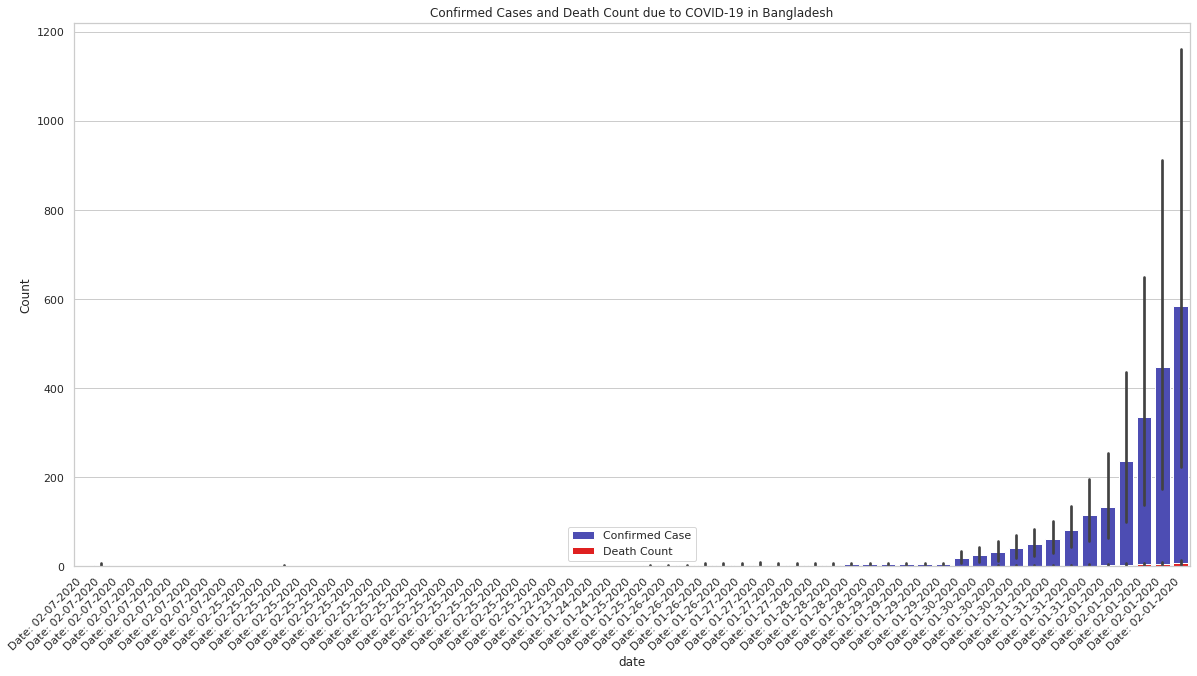

In [199]:
# ax = plt.figure(figsize=(20,10))

# # Add title
# ax = plt.title("Confirmed Cases and Death Count due to COVID-19 in Bangladesh")


# ax = sns.barplot(y=us_df['confirmed_case'], x=us_df['date'], saturation = 0.4, color = 'Blue', label = "Confirmed Case")

# ax = sns.barplot(x = us_df['date'], y = us_df['death'], color = 'red', label = "Death Count")

# ax.legend()



# # ax = sns.color_palette("RdBu", n_colors=7)

# ax.set_xticklabels(labels=us_df['date'], rotation=45, ha='right')


# ax = plt.ylabel("Count")